In [1]:
import sys
import time
import numpy as np
import os.path as osp
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.stats import hmean

from geo_tool import Point_Cloud
import tf_lab.autopredictors.scripts.minhyuk_data as minhyuk_data
from tf_lab.nips.helper import pclouds_centered_and_half_sphere
from tf_lab.autopredictors.evaluate import accuracy_of_completion, coverage_of_completion

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
incomplete_n_samples = 2048
complete_n_samples = 4096
top_data_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/'
center_data_in_u_sphere = True

In [4]:
category_name = minhyuk_data.test_categories[3]
print category_name
gt_pclouds, gt_names = minhyuk_data.groundtruth_point_clouds(category_name, complete_n_samples)
m_completions = minhyuk_data.minhyuk_completions(category_name, complete_n_samples)

coseg_chairs


555


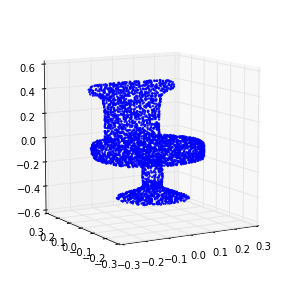

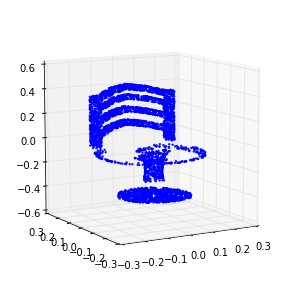

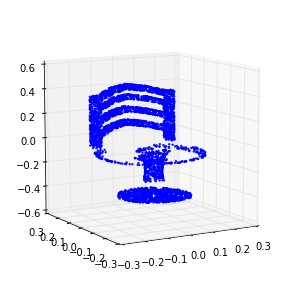

In [16]:
# RUN to see gt-completion pairs are OK.
rid = np.random.randint(len(gt_pclouds))
Point_Cloud(gt_pclouds[rid]).plot()
Point_Cloud(m_completions[rid]).plot()

In [8]:
if center_data_in_u_sphere:
    m_completions = pclouds_centered_and_half_sphere(m_completions)
    gt_pclouds = pclouds_centered_and_half_sphere(gt_pclouds)

In [9]:
# Accuracy and Coverage of Minhuyk Completions.
n_examples = m_completions.shape[0]
pred_scores = np.zeros((n_examples, 2))

for i in xrange(n_examples):    
    gt = gt_pclouds_2[i]
    pred = m_completions_2[i]
    pred_scores[i, 0] = accuracy_of_completion(pred, gt, thres=0.02, ret_dists=False)
    pred_scores[i, 1] = coverage_of_completion(gt, pred, thres=0.02, ret_dists=False)

print 'Test Mean-Median Accuracy:', np.mean(pred_scores[:, 0]), np.median(pred_scores[:, 0])
print 'Test Mean-Median Coverage:', np.mean(pred_scores[:, 1]), np.median(pred_scores[:, 1])

Test Mean-Median Accuracy: 0.776143462816 0.832275390625
Test Mean-Median Coverage: 0.661571755226 0.698486328125
